# Introduction

Once again for part B of the final project I decided to use a Juypter notebook. Furthermore a key component of this notebook is a article written by Yang S, from twardsdatascience.com. The link to the article will be listed below in the references. In this notebook we will be using the Iris data set to test the differences between 3 variations of Gradient Descent.

## Gradient Descent

So what is Gradient Descent? A gradient is a vector moving either from the greatest increase or decrease of a function. In this case we will be looking for the decrease in a function, hence the term descent in gradient descent. 

In [180]:
%matplotlib inline
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

In [181]:
iris = datasets.load_iris()
X=iris.data[0:99,:2]
y=iris.target[0:99]

# Mini Batch Gradient Descent

* Refrence: **https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307**

In [182]:
# Function for mini batch Gradient Descent
def Minibatch_GD (Learning_Rate,num_iterations,X,y,Minibatch):
    # Part 1: Mini Batch 
    np.random.seed(1000)
    N=len(X)
    mini_batches=[]
    
    #Step 1: Shuffle (X,y)
    permutation=list(np.random.permutation(N))
    shuffled_X=X[permutation,:]
    shuffled_y=y[permutation]
    
    #Step 2: Partition
    num_complete_minibatches=int(np.floor(N/Minibatch))
    
    for i in range(num_complete_minibatches):
        mini_batch_X=shuffled_X[i*Minibatch:(i+1)*Minibatch,:]
        mini_batch_y=shuffled_y[i*Minibatch:(i+1)*Minibatch]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    if N % Minibatch !=0:
        mini_batch_X=shuffled_X[N-Minibatch:N,:]
        mini_batch_y=shuffled_y[N-Minibatch:N]
        
        mini_batch = (mini_batch_X, mini_batch_y)
        mini_batches.append(mini_batch)
    
    # Part 2: Gradient Descent
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    
    for i in range(num_iterations):
        for j in range(num_complete_minibatches+1):
            #Select Minibatch
            XX=mini_batches[j][0]
            yy=mini_batches[j][1]
            #Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            
            #Step 3: Calculate Gradient
            dw=1/Minibatch*np.dot(XX.T,(y_pred-yy).T)
            db=1/Minibatch*np.sum(y_pred-yy)
            #Step 4: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 5: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        
        if i % 1000 ==0:
            costs.append(cost)
            #print(cost)
            
    return(w,b,costs)
# Run a function
#Result_MiniGD=Minibatch_GD(Learning_Rate=0.01,num_iterations=100000,X=X,y=y,Minibatch=50)

In [183]:
start = time.time()
Minibatch_results = Minibatch_GD(Learning_Rate=0.01,num_iterations=20000,X=X,y=y,Minibatch=50)
stop = time.time()
minibatch_runtime = stop-start

In [184]:
cost_analysis = pd.DataFrame(Minibatch_results[2], columns=['Cost'])
cost_analysis.insert(0, "itteration", range(1,len(Minibatch_results[2]) + 1))

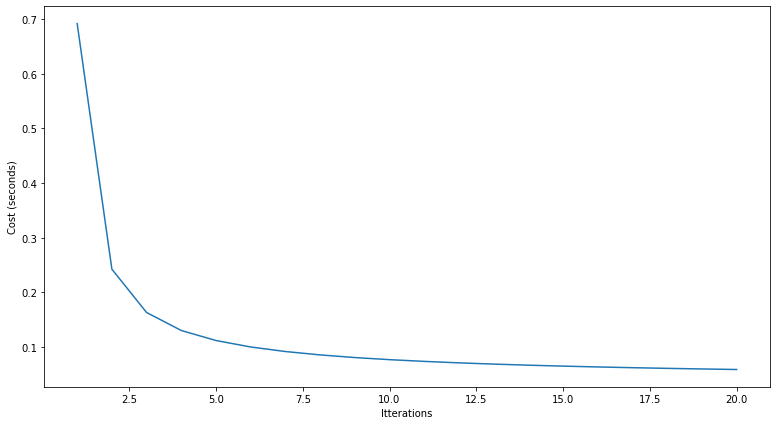

In [199]:
plt.plot(cost_analysis.itteration.tolist(), cost_analysis.Cost.tolist())
plt.ylabel("Cost (seconds)")
plt.xlabel("Itterations")
plt.rcParams["figure.figsize"] = (13,7)

In [186]:
print("Mini Batch total runtime:", minibatch_runtime, "(seconds)")

Mini Batch total runtime: 1.5016210079193115 (seconds)


# Batch Gradient Descent

* Refrence: **https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307**

In [187]:
def Batch_GD (Learning_Rate,num_iterations,X,y):
    #Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting Loop
    for i in range(num_iterations):
        #Step 2: Apply Sigmoid Function and get y prediction
        Z=np.dot(w.T,X.T)+b
        y_pred=1/(1+1/np.exp(Z))
        
        #Step 3: Calculate Loss Function
        cost=-(1/N)*np.sum(y*np.log(y_pred)+(1-y)*np.log(1-y_pred))
        
        #Step 4: Calculate Gradient
        dw=1/N*np.dot(X.T,(y_pred-y).T)
        db=1/N*np.sum(y_pred-y)
        
        #Step 5: Update w & b
        w = w - Learning_Rate * dw
        b = b - Learning_Rate * db
        
        # Records cost
        if i % 1000 == 0:
            costs.append(cost)
            #print(cost)
    return(w,b,costs)

In [188]:
start = time.time()
Result_BatchGD=Batch_GD(Learning_Rate=0.01,num_iterations=20000,X=X,y=y)
stop = time.time()
Batch_runtime = stop-start

In [189]:
batch_cost_analysis = pd.DataFrame(Result_BatchGD[2], columns=['Cost'])
batch_cost_analysis.insert(0, "itteration", range(1,len(Result_BatchGD[2]) + 1))

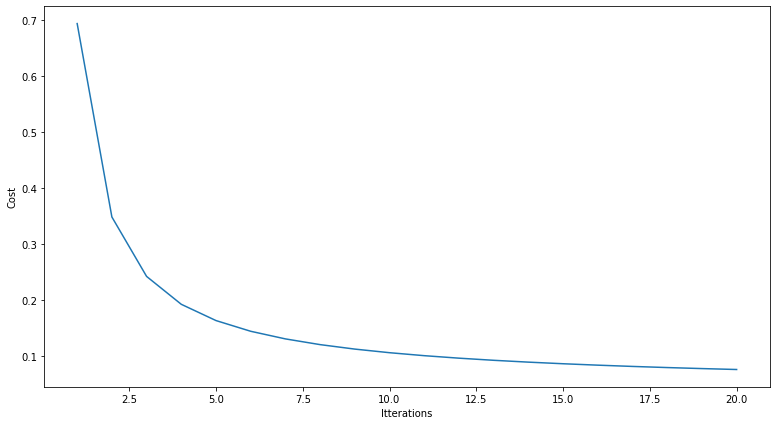

In [190]:
plt.plot(batch_cost_analysis.itteration.tolist(), batch_cost_analysis.Cost.tolist())
plt.ylabel("Cost")
plt.xlabel("Itterations")
plt.rcParams["figure.figsize"] = (13,7)

Comparing mini batch to batch

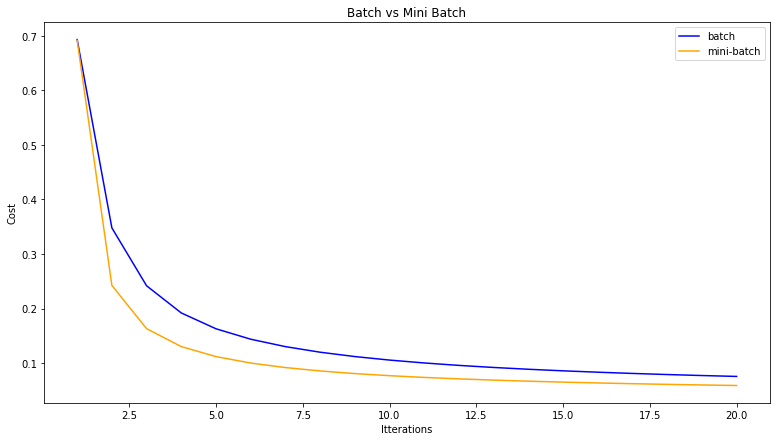

In [191]:
fig, ax = plt.subplots()
ax.set_title('Batch vs Mini Batch')
ax.xaxis.set_label_text('Itterations')
ax.yaxis.set_label_text('Cost')
ax.plot(batch_cost_analysis.itteration.tolist(), batch_cost_analysis.Cost.tolist(), color='blue')
ax.plot(cost_analysis.itteration.tolist(), cost_analysis.Cost.tolist(), color='orange')
ax.legend(['batch','mini-batch'])

# Stochastic Gradient Descent

* Refrence: **https://towardsdatascience.com/an-introduction-to-gradient-descent-c9cca5739307**

In [192]:
# Function for Stochastic Gradient Descent       
def Stochastic_GD (Learning_Rate,num_iterations,X,y):
    # Step 1: Initial Parameter
    N=len(X)
    w=np.zeros((X.shape[1],1))
    b=0
    costs=[]
    # Starting two layer of loops
    for i in range(num_iterations):
        for j in range(N):
            # Choose 1 record
            XX=X[j,:]
            yy=y[j]
            # Step 2: Apply Sigmoid Function and get y prediction
            Z=np.dot(w.T,XX.T)+b
            y_pred=1/(1+1/np.exp(Z))
            #Step 3: Calculate Loss Function
            cost=-(yy*np.log(y_pred)+(1-yy)*np.log(1-y_pred))
            #Step 4: Calculate Gradient
            dw=np.multiply(XX,(y_pred-yy)).reshape((2,1))
            db=y_pred-yy
            #Step 5: Update w & b
            w = w - Learning_Rate * dw
            b = b - Learning_Rate * db
        
        #Step 6: Calculate Loss Function       
        Z_full=np.dot(w.T,X.T)+b
        y_pred_full=1/(1+1/np.exp(Z_full))
        cost=-(1/N)*np.sum(y*np.log(y_pred_full)+(1-y)*np.log(1-y_pred_full))
        #Records cost
        if i % 100 == 0:
            costs.append(cost)
            #print(cost)
    
    return(w,b,costs)

In [193]:
start = time.time()
Result_Stoc_GD=Stochastic_GD(Learning_Rate=0.01,num_iterations=2000,X=X,y=y)
stop= time.time()
Stoc_runtime = stop-start

In [194]:
sot_cost_analysis = pd.DataFrame(Result_Stoc_GD[2], columns=['Cost'])
sot_cost_analysis.insert(0, "itteration", range(1,len(Result_Stoc_GD[2]) + 1))

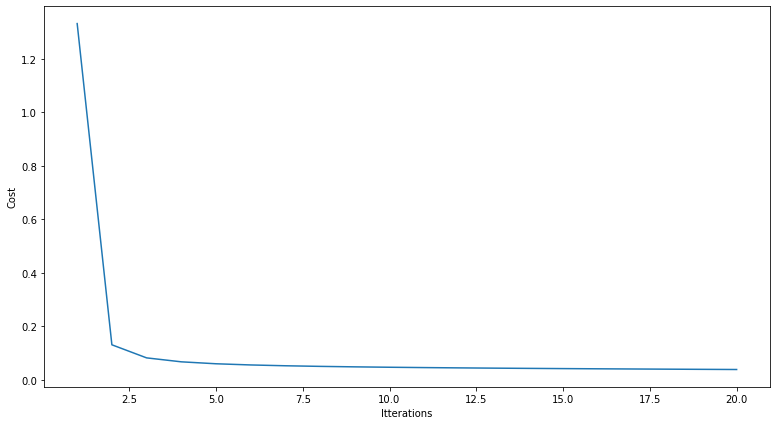

In [195]:
plt.plot(sot_cost_analysis.itteration.tolist(), sot_cost_analysis.Cost.tolist())
plt.ylabel("Cost")
plt.xlabel("Itterations")
plt.rcParams["figure.figsize"] = (13,7)

# Cost vs Itterations graph 

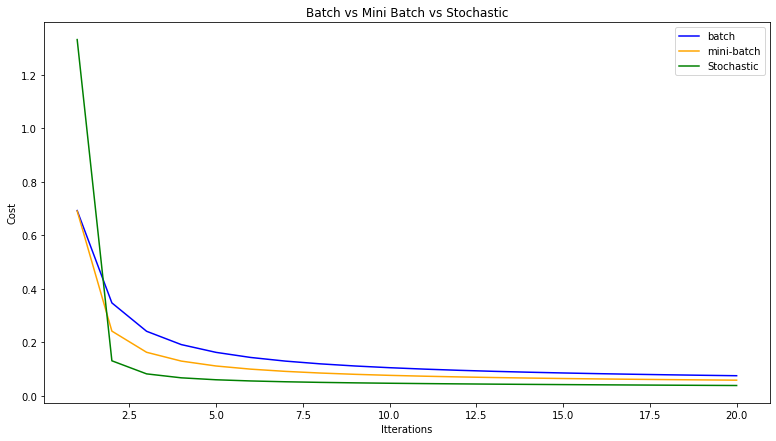

In [198]:
fig, ax = plt.subplots()
ax.set_title('Batch vs Mini Batch vs Stochastic')
ax.xaxis.set_label_text('Itterations')
ax.yaxis.set_label_text('Cost')
ax.plot(batch_cost_analysis.itteration.tolist(), batch_cost_analysis.Cost.tolist(), color='blue')
ax.plot(cost_analysis.itteration.tolist(), cost_analysis.Cost.tolist(), color='orange')
ax.plot(sot_cost_analysis.itteration.tolist(), sot_cost_analysis.Cost.tolist(), color='green')
ax.legend(['batch','mini-batch', 'Stochastic'])

## Graph Disclamer

The graph provied does not match the exact amount of itterations. If we only used 20 itterations we would not see the flat line like we do. However for graphing purposes we needed to take every 1000th cost for both mini-batch and batch. However the amount of itterations that occour with Stochastic decent is far less. Therfor we record 1 of every 100 costs. While this graph does not 100% show the exact 1:1 ratio from itterations and cost. It does show a solid record of its preformance when compared to one another. This gives us a good visualization and a chance to analyze our results without requireing a massive graph.   

## Cost to Itteration Analysis

In the case of the Iris dataset the most accurate descent algorithm is the stochastic descent algorithm. This is shown by the green line depicting the lowest cost of the three. The Stochastic graph indicates it did not start at the most accurate point. But over the iterations it quickly moved down the gradient. While in comparison to the other two decent algorithms (Batch and mini batch) they had a slower and more gradual descent down the gradient. Moving forward you will see the inverse of the following results when it come to runtimes of the algorithms. 

# Runtime Graph

<BarContainer object of 3 artists>

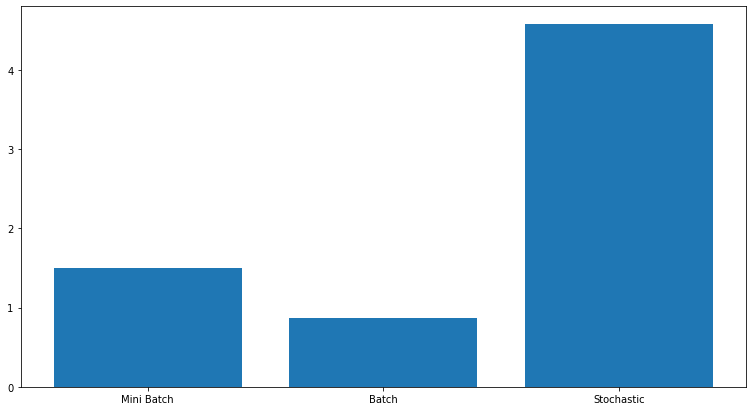

In [197]:
runtimes = [minibatch_runtime, Batch_runtime, Stoc_runtime]
x = ['Mini Batch', 'Batch', 'Stochastic']

plt.bar(x, runtimes)

## Runtime Analysis

The preceding visualization is a bar chart of each decent algorithms runtimes. I calculated runtime by storing two variables (start, stop) before and after the function call of the algorithm. As I mentioned before we notice an inverse when it comes to cost efficiency and runtime. Where the stochastic algorithm was much more effective when it came to finding the lowest cost, It lacked in computation runtime. In our case that is completely fine because we are using a very tiny dataset. However this can become more of an issue if we move to larger and larger datasets. The most effective algorithm when it comes to runtime is the batch descent algorithm. At first I thought I had done something wrong. I had expected the mini batch to run faster than the batch. However the issue isn't with the batches runtime, the issue lies in memory. If we were using a much larger dataset we would need to rapidly ramp up the amount of storage to run every iteration. 